<a href="https://colab.research.google.com/github/hsargoli/MyWorks/blob/main/DEEPlearning_KerasModels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

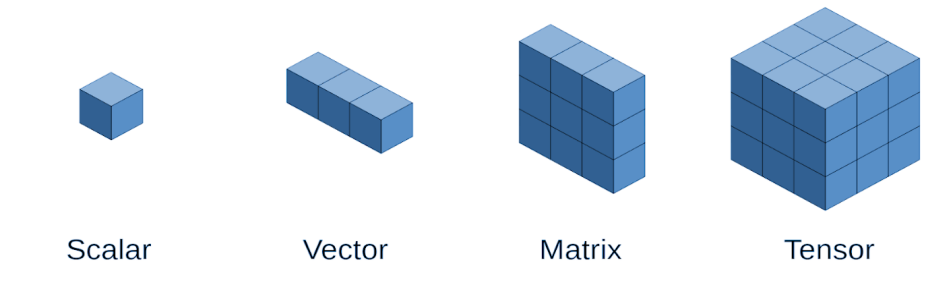

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import cv2
import pandas as pd
import seaborn as sns
import keras.layers as layers
import keras.models as models
from tensorflow.keras.optimizers import SGD
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras.utils import np_utils
import datetime
import keras
from keras.utils.vis_utils import plot_model
import tensorflow as tf
import keras

# read data
b = "/content/drive/MyDrive/path/DATASET/B*.jpg"  # -------------------------------------------------
ch = "/content/drive/MyDrive/path/DATASET/CH*.jpg"  # ----------------------PATH-----------------------
w = "/content/drive/MyDrive/path/DATASET/W*.jpg"  # -------------------------------------------------
data_b = []
datab_tuple = []
data_ch = []
datach_tuple = []
datach_flatten = []
data_w = []
dataw_flatten = []
dataw_tuple = []
for i in glob.glob(b, recursive=True):
    data_b.append(cv2.imread(i, 0))
for i in enumerate(data_b):
    datab_tuple.append(i)
for i in glob.glob(ch, recursive=True):
    data_ch.append(cv2.imread(i, 0))
for i in enumerate(data_ch):
    datach_tuple.append(i)
for i in data_ch:
    datach_flatten.append(i.flatten())
for i in glob.glob(w, recursive=True):
    data_w.append(cv2.imread(i, 0))
for i in enumerate(data_w):
    dataw_tuple.append(i)
for i in data_w:
    dataw_flatten.append(i.flatten())
data_fb = pd.DataFrame(datab_tuple)
data_fb["target"] = (np.ones((len(data_b)))) * 0
data_fch = pd.DataFrame(datach_tuple)
data_fch["target"] = np.ones((len(data_ch)))
###------------------------------------------
worn = np.array(data_w)
chipped = np.array(data_ch)
broken = np.array(data_b)
y_worn = np.ones(len(worn))  # worn ==1    chipped==2  broken==0
y_ch = np.ones(len(chipped)) * 2
y_b = np.ones(len(broken)) * 0
# concataned ALL images
alll = np.concatenate((worn, chipped, broken), axis=0)
y_all = np.concatenate((y_worn, y_ch, y_b), axis=0)
###------------------------------------------
xxf, xtf, yyf, ytf = train_test_split(alll, y_all, test_size=0.3, random_state=25)

trS = 400
x_train = xxf[:trS]
y_train = yyf[:trS]
x_valid = xxf[trS:]
vlS = x_valid.shape[0]

y_valid = yyf[trS:]
x_train = x_train.reshape(trS, 150, 150, 1)
x_valid = x_valid.reshape(vlS, 150, 150, 1)
x_test = xtf.reshape(xtf.shape[0], 150, 150, 1)
x_train = x_train.astype("float32")
x_test = x_test.astype("float32")
x_train /= 255
x_test /= 255
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(ytf)
y_valid = np_utils.to_categorical(y_valid)

print(
    "len worn:",
    len(worn),
    "len broken:",
    len(broken),
    "len ch:",
    len(chipped),
    "\nlen train: ",
    len(xxf),
    "len test: ",
    len(xtf),
)


len worn: 296 len broken: 166 len ch: 218 
len train:  476 len test:  204


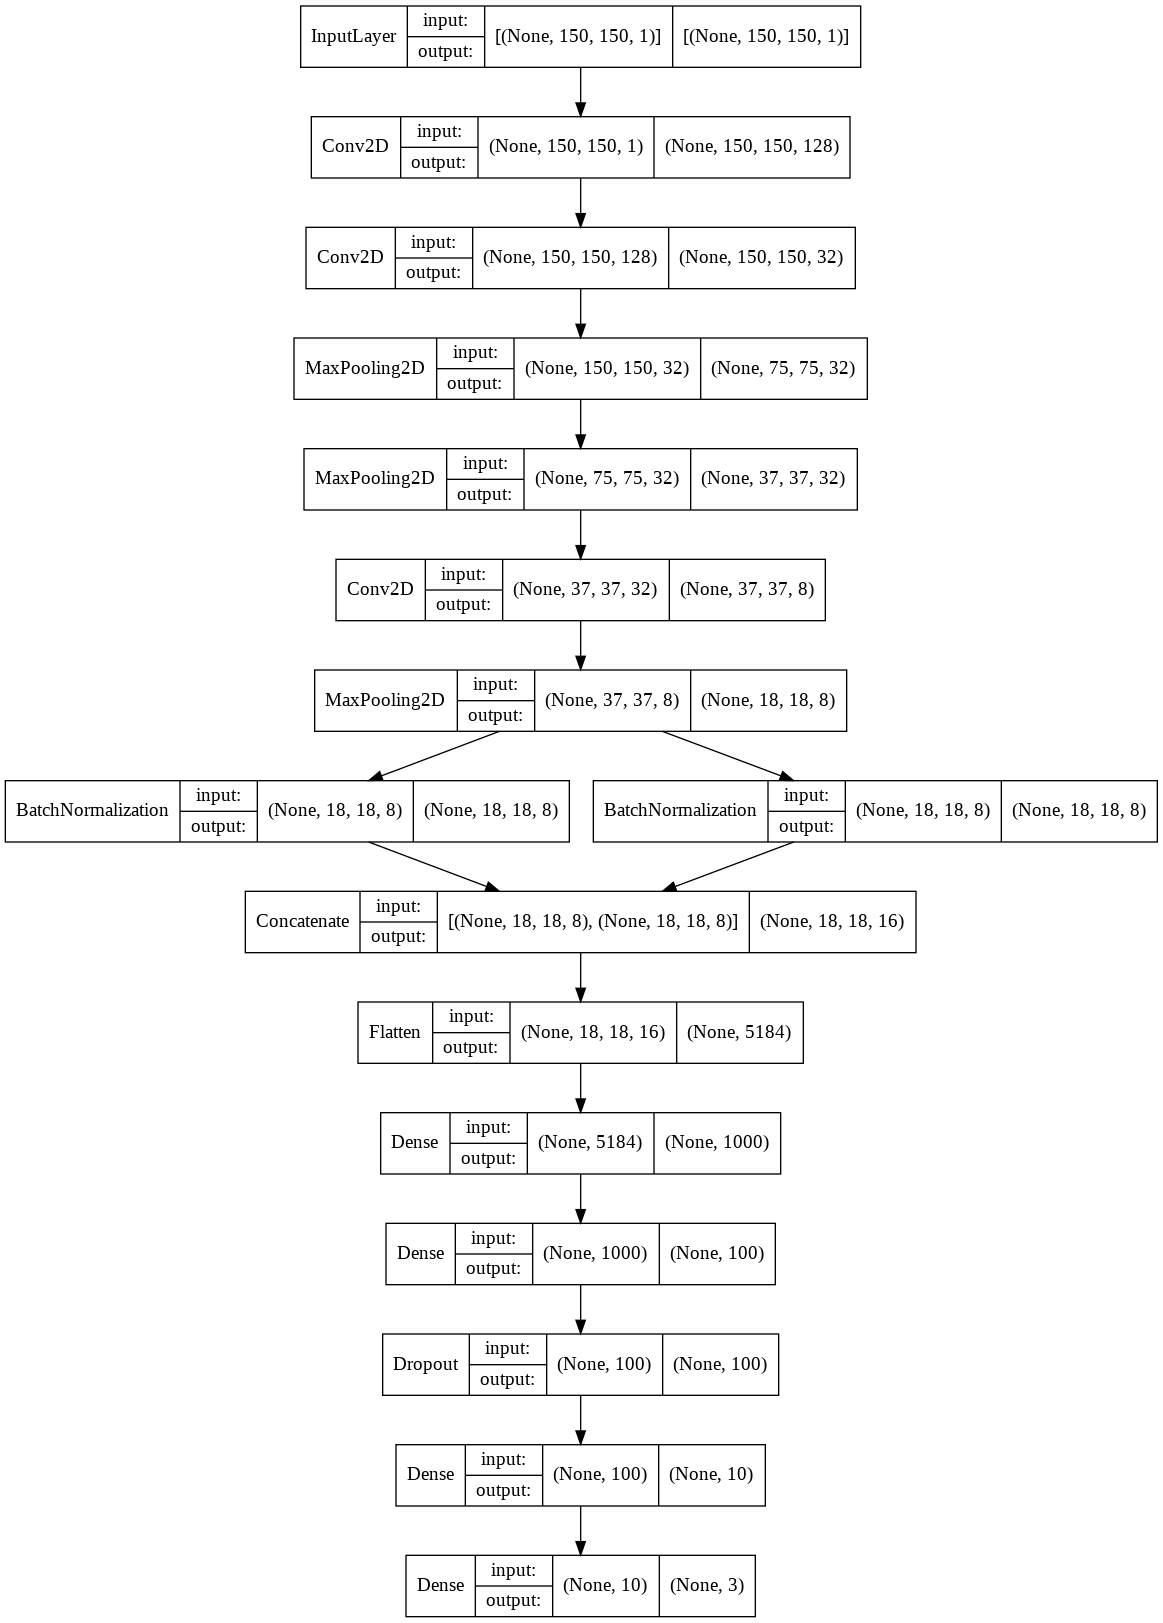

In [ ]:
#----------------------------------
#     conv    MODEL
#----------------------------------
myimput=layers.Input((150,150,1))
x=layers.Conv2D(128,7,activation='relu',padding='SAME')(myimput)
x=layers.Conv2D(32,3,activation='relu',padding='SAME')(x)
x=layers.MaxPooling2D(pool_size=2)(x)
x=layers.MaxPooling2D(pool_size=2)(x)
x=layers.Conv2D(8,3,activation='relu',padding='SAME')(x)
pool2=layers.MaxPooling2D(pool_size=2)(x)

batch_cocat=layers.BatchNormalization()(pool2)
batch_normal=layers.BatchNormalization()(pool2)
concat=layers.concatenate(inputs=[batch_cocat,batch_normal])

flat=layers.Flatten()(concat)
xx=layers.Dense(1000,activation='relu')(flat)
xx=layers.Dense(100,activation='relu')(xx)
xx=layers.Dropout(0.5)(xx)
xx=layers.Dense(10,activation='relu')(xx)
out=layers.Dense(3,activation='softmax')(xx)
conv_model=models.Model(myimput,out)
conv_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

#----------------------------------
# PLOT    MODEL
#----------------------------------
plot_model(conv_model,show_shapes=True,show_layer_names=False)
#conv_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True)

hist = conv_model.fit(x_train,y_train,batch_size=24,epochs=20,validation_data=(x_valid,y_valid),callbacks=[early_stopping_cb])

Epoch 1/20
17/17 [==============================] - 94s 5s/step - loss: 1.0378 - accuracy: 0.4850 - val_loss: 88.6380 - val_accuracy: 0.2895
Epoch 2/20
17/17 [==============================] - 93s 6s/step - loss: 0.6520 - accuracy: 0.7300 - val_loss: 76.1995 - val_accuracy: 0.3553
Epoch 3/20
17/17 [==============================] - 88s 5s/step - loss: 0.3592 - accuracy: 0.8600 - val_loss: 126.6903 - val_accuracy: 0.4737
Epoch 4/20
17/17 [==============================] - 90s 5s/step - loss: 0.2932 - accuracy: 0.8925 - val_loss: 30.8592 - val_accuracy: 0.7500
Epoch 5/20
17/17 [==============================] - 90s 5s/step - loss: 0.2394 - accuracy: 0.9025 - val_loss: 102.4138 - val_accuracy: 0.6316
Epoch 6/20
17/17 [==============================] - 92s 5s/step - loss: 0.2310 - accuracy: 0.9325 - val_loss: 211.7863 - val_accuracy: 0.5395
Epoch 7/20
17/17 [==============================] - 87s 5s/step - loss: 0.1643 - accuracy: 0.9425 - val_loss: 173.6259 - val_accuracy: 0.5658
Epoch 8/2

In [ ]:
history_c=hist.history
print('history type:',type(history_c),'\nhistory keys:',history_c.keys())
loss=history_c['loss']
accuracy=history_c['accuracy']
validation_loss=history_c['val_loss']
validation_acc=history_c['val_accuracy']
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.plot(loss,'r--',linewidth=2),plt.title('loss'),plt.xlabel('epochs'),plt.ylabel('loss')
plt.subplot(2,2,2)
plt.plot(accuracy,'b-.',linewidth=2),plt.title('acc'),plt.xlabel('epochs'),plt.ylabel('accuracy')
plt.subplot(2,2,3)
plt.plot(validation_loss,'g:',linewidth=2),plt.title('validation loss'),plt.xlabel('epochs'),plt.ylabel('loss')
plt.subplot(2,2,4)
plt.plot(validation_acc,'b.-',linewidth=2),plt.title('validation acc'),plt.xlabel('epochs'),plt.ylabel('accuracy')
plt.savefig('d:/Path/D/classification.jpg')
plt.show()


In [ ]:
######################
# sequental Keras Mnist 
######################
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.utils import np_utils
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)


# convert this into a 10-entry one-hot encoded
classes = 10
Y_train = np_utils.to_categorical(Y_train, classes)
Y_test = np_utils.to_categorical(Y_test, classes)

input_size = 784
batch_size = 100
hidden_neurons = 100
epochs = 4


model = Sequential([
 Dense(hidden_neurons, input_dim=input_size),
 Activation('sigmoid'),
 Dense(classes),
 Activation('softmax')
])
model.compile(loss='categorical_crossentropy',metrics=['accuracy'], optimizer='sgd')
model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs,verbose=1)

11501568/11490434 [==============================] - 0s 0us/step
Epoch 1/4
600/600 [==============================] - 3s 3ms/step - loss: 0.9275 - accuracy: 0.7645
Epoch 2/4
600/600 [==============================] - 2s 3ms/step - loss: 0.4784 - accuracy: 0.8820
Epoch 3/4
600/600 [==============================] - 2s 3ms/step - loss: 0.3865 - accuracy: 0.8999
Epoch 4/4
600/600 [==============================] - 3s 6ms/step - loss: 0.3409 - accuracy: 0.9088


313/313 [==============================] - 1s 3ms/step - loss: 0.3209 - accuracy: 0.9165
Testaccuracy: 0.9164999723434448


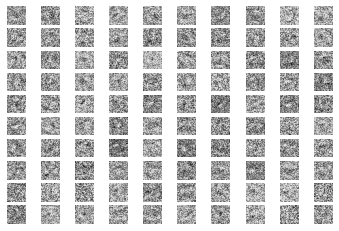

In [ ]:
score = model.evaluate(X_test, Y_test, verbose=1)
print('Testaccuracy:', score[1])
weights = model.layers[0].get_weights()

fig = plt.figure()
w = weights[0].T
for neuron in range(hidden_neurons):
 ax = fig.add_subplot(10, 10, neuron + 1)
 ax.axis("off")
 ax.imshow(numpy.reshape(w[neuron], (28, 28)), cmap=cm.Greys_r)
plt.show()

In [ ]:
import numpy as np

true_b = 1
true_w = 2
N = 100

# Data Generation
np.random.seed(42)
x = np.random.rand(N, 1)
epsilon = (.1 * np.random.randn(N, 1))
y = true_b + true_w * x + epsilon
# Shuffles the indices
idx = np.arange(N)
np.random.shuffle(idx)
# Uses first 80 random indices for train
train_idx = idx[:int(N*.8)]
# Uses the remaining indices for validation
val_idx = idx[int(N*.8):]
# Generates train and validation sets
x_train, y_train = x[train_idx], y[train_idx]
x_val, y_val = x[val_idx], y[val_idx]


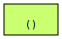

In [ ]:
import torch
from torchviz import make_dot
v = torch.tensor(1.0, requires_grad=True)
make_dot(v)

In [ ]:
import torch
import numpy as np

######################
# Tensor 
######################
# Initialization
# directly
data = [[1,2],[3,4]]
x_data = torch.tensor(data)

# from np array
array = np.array(data)
x_np = torch.from_numpy(array)

# From another tensor
x_ones = torch.ones_like(x_data) # retains the properties of x_data
print(f"Ones Tensor: \n {x_ones} \n")

x_rand = torch.rand_like(x_data, dtype=torch.float) # overrides the datatype of x_data
print(f"Random Tensor: \n {x_rand} \n")

# With random or constant values:

shape = (2, 3,)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")

tensor = torch.rand(3, 4)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")
if torch.cuda.is_available():
  tensor = tensor.to('cuda')
  print(f"Device tensor is stored on: {tensor.device}")
t1 = torch.cat([tensor, tensor, tensor], dim=1)
print(t1)
tensor.add_(5)
t1.shape


Ones Tensor: 
 tensor([[1, 1],
        [1, 1]]) 

Random Tensor: 
 tensor([[0.6419, 0.2976],
        [0.7077, 0.4189]]) 

Random Tensor: 
 tensor([[0.0655, 0.8839, 0.8083],
        [0.7528, 0.8988, 0.6839]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])
Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu
tensor([[0.7658, 0.9149, 0.3993, 0.1100, 0.7658, 0.9149, 0.3993, 0.1100, 0.7658,
         0.9149, 0.3993, 0.1100],
        [0.2541, 0.4333, 0.4451, 0.4966, 0.2541, 0.4333, 0.4451, 0.4966, 0.2541,
         0.4333, 0.4451, 0.4966],
        [0.7865, 0.6604, 0.1303, 0.3498, 0.7865, 0.6604, 0.1303, 0.3498, 0.7865,
         0.6604, 0.1303, 0.3498]])


torch.Size([3, 12])

In [ ]:
# Run random poor classification model with resnet

import torch, torchvision
import numpy as np
model = torchvision.models.resnet18(pretrained=True)
data = torch.rand(1, 3, 64, 64)
labels = torch.rand(1, 1000)

for _ in range(10):
  prediction = model(data) # forward pass
  loss = (prediction - labels).sum()
  print(loss)
  loss.backward() # backward pass
  optim = torch.optim.SGD(model.parameters(), lr=1e-2, momentum=0.9)
  optim.step() #gradient descent

# print(prediction,loss)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

tensor(-510.1591, grad_fn=<SumBackward0>)
tensor(-4979.2861, grad_fn=<SumBackward0>)
tensor(-16286.2305, grad_fn=<SumBackward0>)
tensor(-46104.1562, grad_fn=<SumBackward0>)
tensor(-138525.2812, grad_fn=<SumBackward0>)
tensor(-456873.9688, grad_fn=<SumBackward0>)
tensor(-1615770., grad_fn=<SumBackward0>)
tensor(-6069492., grad_fn=<SumBackward0>)
tensor(-23737286., grad_fn=<SumBackward0>)
tensor(-95033936., grad_fn=<SumBackward0>)


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        # 1 input image channel, 6 output channels, 5x5 square convolution
        # kernel
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(16 * 5 * 5, 120)  # 5*5 from image dimension
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # If the size is a square, you can specify with a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = torch.flatten(x, 1) # flatten all dimensions except the batch dimension
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [ ]:
params = list(net.parameters())
print(len(params))
print(params[0].size())  # conv1's .weight

10
torch.Size([6, 1, 5, 5])


In [ ]:
input = torch.randn(1, 1, 32, 32)
out = net(input)
print(out)

tensor([[ 0.1266,  0.0509,  0.0719, -0.0269, -0.0202,  0.2326,  0.0683,  0.0440,
          0.2067,  0.0247]], grad_fn=<AddmmBackward0>)


In [ ]:
net.zero_grad()
out.backward(torch.randn(1, 10))

In [ ]:
output = net(input)
target = torch.randn(10)  # a dummy target, for example
target = target.view(1, -1)  # make it the same shape as output
criterion = nn.MSELoss()

loss = criterion(output, target)
print(loss)

tensor(0.8679, grad_fn=<MseLossBackward0>)


[activation function](https://www.analyticsvidhya.com/blog/2021/04/activation-functions-and-their-derivatives-a-quick-complete-guide/)


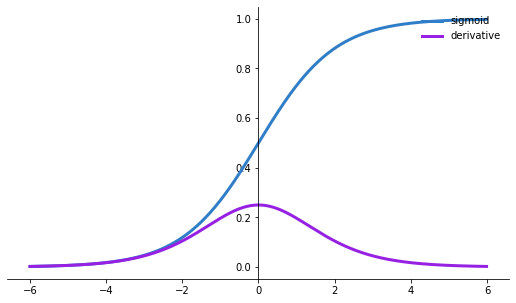

In [ ]:
# ----------------------------------------------
# Tanh Activation Function

import matplotlib.pyplot as plt
import numpy as np
def sigmoid(x):
    s=1/(1+np.exp(-x))
    ds=s*(1-s)  
    return s,ds
x=np.arange(-6,6,0.01)
sigmoid(x)
fig, ax = plt.subplots(figsize=(9, 5))
ax.spines['left'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.plot(x,sigmoid(x)[0], color="#307EC7", linewidth=3, label="sigmoid")
ax.plot(x,sigmoid(x)[1], color="#9621E2", linewidth=3, label="derivative")
ax.legend(loc="upper right", frameon=False)
fig.show()

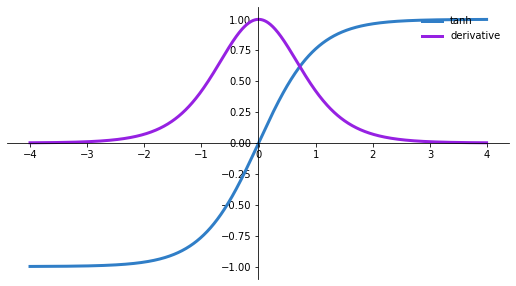

In [ ]:
# ----------------------------------------------
# sigmoid

import matplotlib.pyplot as plt
import numpy as np
def tanh(x):
    t=(np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))
    dt=1-t**2
    return t,dt
z=np.arange(-4,4,0.01)
tanh(z)[0].size,tanh(z)[1].size
fig, ax = plt.subplots(figsize=(9, 5))
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.plot(z,tanh(z)[0], color="#307EC7", linewidth=3, label="tanh")
ax.plot(z,tanh(z)[1], color="#9621E2", linewidth=3, label="derivative")
ax.legend(loc="upper right", frameon=False)
fig.show()

pytorch

In [ ]:
# Sequental pytorch Network
import pandas as pd
import torch

####################################
# load dataset
dataset = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',
                      names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species'])

####################################
# integer encoding
dataset['species'] = pd.Categorical(dataset['species']).codes
print(dataset)

####################################
# Changes in index of data at random
dataset = dataset.sample(frac=1, random_state=1234)

####################################
# split data to train and test
train_input = dataset.values[:120, :4]
train_target = dataset.values[:120, 4]
test_input = dataset.values[120:, :4]
test_target = dataset.values[120:, 4]


####################################
torch.manual_seed(1234)

####################################
# make sequental model
net = torch.nn.Sequential(
 torch.nn.Linear(4, 300),
 torch.nn.ReLU(),
 torch.nn.Linear(300, 3)
)


     sepal_length  sepal_width  petal_length  petal_width  species
0             5.1          3.5           1.4          0.2        0
1             4.9          3.0           1.4          0.2        0
2             4.7          3.2           1.3          0.2        0
3             4.6          3.1           1.5          0.2        0
4             5.0          3.6           1.4          0.2        0
..            ...          ...           ...          ...      ...
145           6.7          3.0           5.2          2.3        2
146           6.3          2.5           5.0          1.9        2
147           6.5          3.0           5.2          2.0        2
148           6.2          3.4           5.4          2.3        2
149           5.9          3.0           5.1          1.8        2

[150 rows x 5 columns]


In [ ]:

#################################### crossEntropy
# https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html
criterion = torch.nn.CrossEntropyLoss()

#################################### crossEntropy
# https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html
optimizer = torch.optim.SGD(net.parameters(), lr=0.1, momentum=0.9)

####################################
# train
epochs = 0
while epochs <= 39:
 inputs = torch.autograd.Variable(torch.Tensor(train_input).float())
 targets = torch.autograd.Variable(torch.Tensor(train_target).long())
 optimizer.zero_grad()
 out = net(inputs)
 loss = criterion(out, targets)
 loss.backward()
 optimizer.step()
 print('Epoch %d \t Loss: %.4f' % (epochs , loss.item()))
 epochs += 1

Epoch 0 	 Loss: 1.0056
Epoch 1 	 Loss: 4.6249
Epoch 2 	 Loss: 9.0652
Epoch 3 	 Loss: 13.6612
Epoch 4 	 Loss: 6.9163
Epoch 5 	 Loss: 3.5398
Epoch 6 	 Loss: 2.8436
Epoch 7 	 Loss: 1.0879
Epoch 8 	 Loss: 1.3232
Epoch 9 	 Loss: 0.5176
Epoch 10 	 Loss: 1.0695
Epoch 11 	 Loss: 1.0071
Epoch 12 	 Loss: 0.6699
Epoch 13 	 Loss: 0.3521
Epoch 14 	 Loss: 0.6090
Epoch 15 	 Loss: 0.3676
Epoch 16 	 Loss: 0.4434
Epoch 17 	 Loss: 0.2441
Epoch 18 	 Loss: 0.4949
Epoch 19 	 Loss: 0.1933
Epoch 20 	 Loss: 0.2989
Epoch 21 	 Loss: 0.3258
Epoch 22 	 Loss: 0.1535
Epoch 23 	 Loss: 0.1749
Epoch 24 	 Loss: 0.2652
Epoch 25 	 Loss: 0.2321
Epoch 26 	 Loss: 0.1076
Epoch 27 	 Loss: 0.1923
Epoch 28 	 Loss: 0.2972
Epoch 29 	 Loss: 0.1373
Epoch 30 	 Loss: 0.1162
Epoch 31 	 Loss: 0.2117
Epoch 32 	 Loss: 0.1268
Epoch 33 	 Loss: 0.0951
Epoch 34 	 Loss: 0.1507
Epoch 35 	 Loss: 0.1034
Epoch 36 	 Loss: 0.0902
Epoch 37 	 Loss: 0.1228
Epoch 38 	 Loss: 0.0893
Epoch 39 	 Loss: 0.0899


In [ ]:
# evaluate model

import numpy as np
inputs = torch.autograd.Variable(torch.Tensor(test_input).float())
targets = torch.autograd.Variable(torch.Tensor(test_target).long())
optimizer.zero_grad()
out = net(inputs)
_, predicted = torch.max(out.data, 1)
error_count = test_target.size - np.count_nonzero((targets == predicted).numpy())
print('Errors: %d; Accuracy: %d%%' % (error_count, 100 * torch.sum(targets == predicted) / test_target.size))


Errors: 2; Accuracy: 93%


In [ ]:
import matplotlib.pyplot as plt
import numpy
from matplotlib.colors import ListedColormap

def tanh(x): 
  return (1.0 - numpy.exp(-2*x))/(1.0 + numpy.exp(-2*x))

def tanh_derivative(x):
 return (1 + tanh(x))*(1 - tanh(x))
 
class NeuralNetwork:
  # net_arch consists of a list of integers, indicating
  # the number of neurons in each layer
  def __init__(self, net_arch):
    self.activation_func = tanh
    self.activation_derivative = tanh_derivative
    self.layers = len(net_arch)
    self.steps_per_epoch = 1000
    self.net_arch = net_arch
    # initialize the weights with random values in the range
    (-1,1)
    self.weights = []
    for layer in range(len(net_arch) - 1):
      w = 2 * numpy.random.rand(net_arch[layer] + 1,
      net_arch[layer + 1]) - 1
      self.weights.append(w)

In [ ]:
def fit(self, data, labels, learning_rate=0.1, epochs=10):
 """
 :param data: data is the set of all possible pairs of
booleans
 True or False indicated by the integers 1 or 0
 labels is the result of the logical operation
'xor'
 on each of those input pairs
 :param labels: array of 0/1 for each datum
 """
 # Add bias units to the input layer
 ones = numpy.ones((1, data.shape[0]))
 Z = numpy.concatenate((ones.T, data), axis=1)
 training = epochs * self.steps_per_epoch
 for k in range(training):
  if k % self.steps_per_epoch == 0:
    print('epochs: {}'.format(k /
    self.steps_per_epoch))
    for s in data:
      print(s, nn.predict(s))

In [ ]:
# this example picked up from :
# https://pytorch.org/tutorials/beginner/pytorch_with_examples.html
# -*- coding: utf-8 -*-
import numpy as np
import math

# Create random input and output data
x = np.linspace(-math.pi, math.pi, 2000)
y = np.sin(x)

# Randomly initialize weights
a = np.random.randn()
b = np.random.randn()
c = np.random.randn()
d = np.random.randn()

learning_rate = 1e-6
for t in range(2000):
    # Forward pass: compute predicted y
    # y = a + b x + c x^2 + d x^3
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    # Compute and print loss
    loss = np.square(y_pred - y).sum()
    if t % 100 == 99:
        print(t, loss)

    # Backprop to compute gradients of a, b, c, d with respect to loss
    grad_y_pred = 2.0 * (y_pred - y)
    grad_a = grad_y_pred.sum()
    grad_b = (grad_y_pred * x).sum()
    grad_c = (grad_y_pred * x ** 2).sum()
    grad_d = (grad_y_pred * x ** 3).sum()

    # Update weights
    a -= learning_rate * grad_a
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d

print(f'Result: y = {a} + {b} x + {c} x^2 + {d} x^3')

99 1589.2370771168942
199 1069.3111015480756
299 720.9960422885218
399 487.478155331347
499 330.8038183817944
599 225.60316925385607
699 154.9071768153947
799 107.35834396721134
899 75.34977182903647
999 53.782930379612985
1099 39.237964996685776
1199 29.419209877413344
1299 22.784392766313402
1399 18.296516180128933
1499 15.25771516310386
1599 13.197928265899911
1699 11.800242777552892
1799 10.85079439627882
1899 10.205118358417053
1999 9.765531122880919
Result: y = 0.022858342639828416 + 0.8353989387220605 x + -0.003943444469833748 x^2 + -0.09029468899350432 x^3


In [ ]:
from torchvision import models
resnet = models.resnet101(pretrained=True)
#dir(models)
resnet.eval()


Downloading: "https://download.pytorch.org/models/resnet101-63fe2227.pth" to /root/.cache/torch/hub/checkpoints/resnet101-63fe2227.pth


  0%|          | 0.00/171M [00:00<?, ?B/s]

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


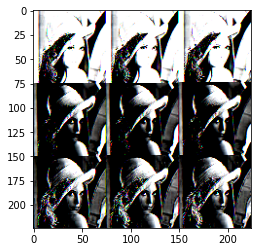

In [ ]:
from torchvision import transforms
preprocess = transforms.Compose([
  transforms.Resize(256),
  transforms.CenterCrop(224),
  transforms.ToTensor(),
  transforms.Normalize(
  mean=[0.485, 0.456, 0.406],
  std=[0.229, 0.224, 0.225]
  )])
from PIL import Image
a = Image.open('/content/drive/MyDrive/1.jpg')
img_t = preprocess(a)
import matplotlib.pyplot as plt
import torch
batch_t = torch.unsqueeze(img_t, 0)
img_t3 = img_t.reshape(224,224,3)
plt.imshow(img_t3)


In [ ]:
out = resnet(batch_t)
_, indices = torch.sort(out, descending=True)
indices[0]

tensor([459, 501, 445, 775, 434, 399, 639, 601, 578, 452, 854, 638, 731, 655,
        606, 808, 862, 689, 797, 400, 594, 585, 887, 672, 699, 841, 564, 903,
        879, 552, 885, 697, 921, 911, 589, 669, 917, 838, 824, 568, 794, 456,
        470, 749, 735, 894, 876, 516, 680, 515, 691, 588, 570, 591, 788, 433,
        514, 608, 831, 846, 793, 490, 869, 834, 629, 431, 577, 643, 741, 678,
        551, 417, 743, 840, 556, 958, 897, 999, 631, 435, 461, 889, 982, 836,
        782, 693, 476, 857, 614, 837, 543, 112, 789, 419, 687, 667, 713, 617,
        861, 733, 558, 762, 865, 168, 683, 559, 453, 604, 583, 884, 528, 851,
        545,  43, 811, 910, 467, 769, 711, 463, 469, 576, 641, 830, 406, 796,
        648, 739, 936, 774, 618, 409, 494, 818, 906, 763, 480, 890, 786, 728,
        905, 720, 454, 462, 636, 524, 812, 619, 765, 843, 729, 365, 747, 416,
        707, 523, 380, 785, 486, 700, 487, 736, 474,  71, 371, 742, 566, 681,
        499, 600, 151, 819, 750, 271, 916, 539, 478,  51, 439, 8

In [ ]:
import pandas as pd
dataset = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',
 names=['sepal_length', 'sepal_width','petal_length', 'petal_width', 'species'])
dataset['species'] = pd.Categorical(dataset['species']).codes
dataset = dataset.sample(frac=1, random_state=1234)
train_input = dataset.values[:120, :4]
train_target = dataset.values[:120, 4]
test_input = dataset.values[120:, :4]
test_target = dataset.values[120:, 4]
dataset

,sepal_length,sepal_width,petal_length,petal_width,species
91,6.1,3.0,4.6,1.4,1
63,6.1,2.9,4.7,1.4,1
103,6.3,2.9,5.6,1.8,2
6,4.6,3.4,1.4,0.3,0
59,5.2,2.7,3.9,1.4,1
...,...,...,...,...,...
143,6.8,3.2,5.9,2.3,2
116,6.5,3.0,5.5,1.8,2
53,5.5,2.3,4.0,1.3,1
38,4.4,3.0,1.3,0.2,0


In [ ]:
import torch
torch.manual_seed(1234)
hidden_units = 5
net = torch.nn.Sequential(
 torch.nn.Linear(4, hidden_units),
 torch.nn.ReLU(),
 torch.nn.Linear(hidden_units, 3)
)
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net.parameters(), lr=0.1,
momentum=0.9)

# train
epochs = 50
for epoch in range(epochs):
 inputs = torch.autograd.Variable(torch.Tensor(train_input).float())
 targets = torch.autograd.Variable(torch.Tensor(train_target).long())
 optimizer.zero_grad()
 out = net(inputs)
 loss = criterion(out, targets)
 loss.backward()
 optimizer.step()
if epoch == 0 or (epoch + 1) % 10 == 0:
 print('Epoch %d Loss: %.4f' % (epoch + 1, loss.item()))


Epoch 50 Loss: 0.0855


In [ ]:
import numpy as np
inputs = torch.autograd.Variable(torch.Tensor(test_input).float())
targets = torch.autograd.Variable(torch.Tensor(test_target).long())
optimizer.zero_grad()
out = net(inputs)
_, predicted = torch.max(out.data, 1)
error_count = test_target.size - np.count_nonzero((targets ==
predicted).numpy())
print('Errors: %d; Accuracy: %d%%' % (error_count, 100 *
torch.sum(targets == predicted) / test_target.size))


Errors: 0; Accuracy: 100%


In [ ]:
import keras.backend as K

def myAccuracy(y_true, y_pred):
    diff = K.abs(y_true-y_pred) # absolute difference between correct and predicted values
    correct = K.less(diff,0.05) # tensor with 0 for false values and 1 for true values
    return K.mean(correct) # sum all 1's and divide by the total.
fcm = models.Sequential()
fcm.add(layers.Dense(2000,activation='relu', input_shape=(120,4)))
fcm.add(layers.Dense(500, activation='sigmoid'))
fcm.add(layers.Dense(1, activation='softmax'))


fcm.summary()

fcm.compile(optimizer='adam', loss='mse', metrics=[myAccuracy])

hist=fcm.fit(train_input,train_target,batch_size=10,epochs=20)


Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 120, 2000)         10000     
_________________________________________________________________
dense_37 (Dense)             (None, 120, 500)          1000500   
_________________________________________________________________
dense_38 (Dense)             (None, 120, 1)            501       
Total params: 1,011,001
Trainable params: 1,011,001
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
12/12 [==============================] - 1s 19ms/step - loss: 0.6417 - myAccuracy: 0.3583
Epoch 2/20
12/12 [==============================] - 0s 15ms/step - loss: 0.6417 - myAccuracy: 0.3583
Epoch 3/20
12/12 [==============================] - 0s 16ms/step - loss: 0.6417 - myAccuracy: 0.3583
Epoch 4/20
12/12 [==============================] - 0s 11ms/step - loss

In [ ]:
a = fcm.predict(train_input)
list(zip(a,train_target))

Convolutional Neural Network
[this](https://www.analyticsvidhya.com/blog/2021/08/beginners-guide-to-convolutional-neural-network-with-implementation-in-python/)

----

This algorithm is inspired by the working of a part of the human brain which is the Visual Cortex

https://keras.io/



----

 a dense layer is a layer that is deeply connected with its preceding layer which means the neurons of the layer are connected to every neuron of its preceding layer. This layer is the most commonly used layer in artificial neural network networks.
[more on analyticsindiamag](https://analyticsindiamag.com/a-complete-understanding-of-dense-layers-in-neural-networks/)



-----


In [ ]:
import pandas as pd
import numpy as np
df = pd.read_excel("https://github.com/chris1610/pbpython/blob/master/data/sample-salesv3.xlsx?raw=true")
x = np.concatenate((df['unit price'], df['ext price']))
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns = housing.feature_names)
df['price'] = housing['target']
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [ ]:
a = df[['HouseAge', 'AveRooms', 'AveBedrms']]
b = np.array(df[df.columns[2:4]])
b = b[:100,:]
y = np.array(df[df.columns[-1]])
y = y[:100]

import seaborn as sb
from sklearn.preprocessing import scale, normalize, minmax_scale
normalize_data0 = normalize([b[:,0]], norm='l1', axis = 1)
normalize_data1 = normalize([b[:,1]], norm='l1', axis = 1)
y = normalize([y], norm = 'l1', axis = 1)
normalize_data = np.array(list(zip(normalize_data0,normalize_data1)))
normalize_data = normalize_data.reshape(100,2)
y = y.reshape(100,)

In [ ]:
import keras.backend as K
accepted_diff = 0.01
def linear_regression_equality(y_true, y_pred):
    diff = K.abs(y_true-y_pred)
    return K.mean(K.cast(diff < accepted_diff, tf.float32))


In [ ]:
# simplest model: sequential (keras library) 
import tensorflow as tf 
import tensorflow.python.keras as keras
from tensorflow.python.keras import layers
from tensorflow.python.keras import models
fcm = models.Sequential()
fcm.add(layers.Dense(2000,activation='relu', input_shape=(120,4)))
fcm.add(layers.Dense(1000, activation='relu'))

fcm.add(layers.Dense(500, activation='sigmoid'))
fcm.add(layers.Dropout(.5))
fcm.add(layers.Dense(100, activation='sigmoid'))
fcm.add(layers.Dense(20, activation='relu'))
fcm.add(layers.Dropout(.5))

fcm.add(layers.Dense(10, activation='sigmoid'))
fcm.add(layers.Dense(5, activation='sigmoid'))

fcm.add(layers.Dense(1, activation='sigmoid'))


fcm.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 120, 2000)         10000     
_________________________________________________________________
dense_17 (Dense)             (None, 120, 1000)         2001000   
_________________________________________________________________
dense_18 (Dense)             (None, 120, 500)          500500    
_________________________________________________________________
dropout_4 (Dropout)          (None, 120, 500)          0         
_________________________________________________________________
dense_19 (Dense)             (None, 120, 100)          50100     
_________________________________________________________________
dense_20 (Dense)             (None, 120, 20)           2020      
_________________________________________________________________
dropout_5 (Dropout)          (None, 120, 20)          

In [ ]:
fcm.compile(optimizer='adam', loss='mse', metrics=[tf.keras.metrics.Accuracy()])

hist=fcm.fit(normalize_data[:,0],y,batch_size=5,epochs=20)

Epoch 1/20


ValueError: ignored

In [ ]:
a , accuracy = fcm.evaluate(normalize_data[:,0],y)
print('Accuracy: %.2f' % (accuracy*100))
fcm.predict(normalize_data[:,0])

4/4 [==============================] - 0s 12ms/step - loss: 0.0195 - accuracy: 0.0000e+00
Accuracy: 0.00


array([[[0.149499  ]],

       [[0.149499  ]],

       [[0.149499  ]],

       [[0.149499  ]],

       [[0.14949903]],

       [[0.149499  ]],

       [[0.149499  ]],

       [[0.14949903]],

       [[0.149499  ]],

       [[0.149499  ]],

       [[0.14949903]],

       [[0.149499  ]],

       [[0.149499  ]],

       [[0.149499  ]],

       [[0.14949903]],

       [[0.149499  ]],

       [[0.149499  ]],

       [[0.149499  ]],

       [[0.149499  ]],

       [[0.14949903]],

       [[0.149499  ]],

       [[0.149499  ]],

       [[0.149499  ]],

       [[0.14949903]],

       [[0.149499  ]],

       [[0.14949903]],

       [[0.149499  ]],

       [[0.149499  ]],

       [[0.14949903]],

       [[0.149499  ]],

       [[0.149499  ]],

       [[0.149499  ]],

       [[0.149499  ]],

       [[0.14949903]],

       [[0.149499  ]],

       [[0.149499  ]],

       [[0.149499  ]],

       [[0.149499  ]],

       [[0.149499  ]],

       [[0.149499  ]],

       [[0.149499  ]],

       [[0.14949

In [ ]:
import glob
import cv2
import numpy as np
import matplotlib.pyplot as plt

b='/content/drive/My Drive/path/DATASET/B*.jpg' #-------------------------------------------------
ch='/content/drive/My Drive/path/DATASET/CH*.jpg' #----------------------PATH-----------------------
w='/content/drive/My Drive/path/DATASET/W*.jpg' #------------------------------------------------- 
data_b=[]
data_ch=[]
data_w=[]
for i in glob.glob(b,recursive=True):
    data_b.append(cv2.imread(i,0))
for i in glob.glob(ch,recursive=True):
    data_ch.append(cv2.imread(i,0))
for i in glob.glob(w,recursive=True):
    data_w.append(cv2.imread(i,0))


In [ ]:
a = [cv2.imread(i,0) for i in glob.glob(b,recursive=True)]
a = np.array(a)


(166, 150, 150)

⛹⛹⛹⛹⛹⛹⛹⛹⛹⛹⛹⛹⛹⛹⛹⛹

⛹

⛹⛹⛹⛹⛹⛹⛹⛹⛹⛹⛹⛹

⛹⛹⛹⛹⛹⛹

⛹⛹⛹⛹⛹⛹⛹⛹⛹⛹⛹⛹⛹⛹⛹⛹⛹⛹⛹⛹


In [ ]:
# sad about it 
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle competitions download cat-and-dog


In [ ]:
# Soft max